Загрузите данные и выполните следующие задания:

-постройте графики стоимости акций на начало каждого дня

-отразите на графике объёмы торгов за каждый день. 



Ход решения:

-загрузить сюда данные

записать их в список

взять нужную часть списка

сделать два списка с нужными данными

посторить по этим спискам график

In [1]:

import matplotlib.pyplot as plt
%matplotlib inline
import csv
import re

from datetime import date

import pylab
import matplotlib.dates

ищем кол-во дней за последние три года

In [2]:
with open('HistoricalQuotesAAPL.csv', newline='') as f:
    reader = csv.reader(f)
    aapl_list = list(reader)
    
"""дата последнего дня"""

max_day = aapl_list[1][0]


"""последние четыре цыфры - год"""

pattern = re.search('\d{4}', max_day)
year = pattern.group() #получили 2020 str
year = str(int(year) - 3) # получили 2017 str

max_day = max_day[0:-4] # '12/04/'
min_day = max_day + year # '12/04/2017'

"""найдем индекс для этой даты"""

for t in range(len(aapl_list)):
    if aapl_list[t][0] == min_day:
        day = t
day += 1 # т.к. в первой строке еще лежит название столбцов, идекс 0 (day = 758)
type(day)


int

ф-я записывает в список значения стоимости акции на начало дня, и делает каждое значение вещественным числом

In [3]:
def open_w(stock_list):
    open_list = []
    for t in range(1, (day)):
        open_list.append(stock_list[t][3])
        open_list_rab = ' '.join(open_list)
    open_list_rab = re.sub('[$]', ' ', open_list_rab)
    open_list_rab = open_list_rab.rstrip()
    open_list_rab = open_list_rab.strip()
    open_list = open_list_rab.split('   ')
    for j in range(len(open_list)):
        str_ = open_list[j]
        float_ = float(str_)
        del open_list[0]
        open_list.append(float_)
    open_list.reverse() # 1ая дата 4 декабря 2017
    # последняя дата 4 декабря 2020
    return open_list


ф-я записывает объем торгов да день 

In [4]:
def volume_w(stock_list):
    volume_list = []
    for r in range(1, (day+1)):
        volume_list.append(stock_list[r][2])
    for j in range(len(volume_list)):
        str_ = volume_list[j]
        int_ = int(str_)
        del volume_list[0]
        volume_list.append(int_)
    volume_list.reverse()
    return volume_list

делаем список из дат

In [28]:
with open('HistoricalQuotesAAPL.csv', newline='') as f:
    reader = csv.reader(f)
    aapl_list = list(reader)


def data_w(stock_list):
    data_list = []
    data_rub_list = []
    data_rub2 = []
    for t in range(1, 759):
        data_list.append(aapl_list[t][0])
    for q in range(len(data_list)):
        data_rub = data_list[q]
        data_rub_list = data_rub.split('/')
        data_list.append(data_rub_list)
    data_list = data_list[759:]
    data_list.reverse()
    """здесь мы получаем список списков с датами в формате: мес./день/год"""
    for p in range(len(data_list)):
        data_rub2.append(data_list[p][2])
        data_rub2.append(data_list[p][1])
        data_rub2.append(data_list[p][0])
    """здесть получили список год, месяц, число, год, месяц, число и т.д."""
    for r in range(len(data_rub2)):
        str_ = data_rub2[r]
        int_ = int(str_)
        del data_rub2[0]
        data_rub2.append(int_)
    """а здесь мы получили этот же список, но все значения типа int"""
    return data_rub2

x = data_w(aapl_list)
x_len = len(x) # 2271
x_data = []

if __name__ == "__main__":
    for t in range(1, x_len, 3):
        x_data.append(date(x[t-1], x[t], x[t+1]))

#xdata_float = matplotlib.dates.date2num(x_data)
x_data

ValueError: month must be in 1..12

In [ ]:
x_len = len(x) # 2271
x_data = []

if __name__ == "__main__":
    for t in range(1, x_len, 3):
        x_data.append(date(x[t-1], x[t], x[t+1]))

#xdata_float = matplotlib.dates.date2num(x_data)
x_data

AAPL

In [6]:
""" получили списки в списке
первый список название столбцов """

with open('HistoricalQuotesAAPL.csv', newline='') as f:
    reader = csv.reader(f)
    aapl_list = list(reader)

print('Всего строк + 1(нзвания столбцов):', len(aapl_list))
print(aapl_list[1][0])
print(type(aapl_list[1][0]))

Всего строк + 1(нзвания столбцов): 1259
12/04/2020
<class 'str'>


In [7]:
""" названия столбцов """

name = aapl_list[0]

name


['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

OY: стоимость акции на начало дня

OX: день (1258 значений)

нужно взять последние три года (первые 758 строк, 1ая строка - названия столбцов)

<ipython-input-22-fe2e79a25a38>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = pylab.subplot(1, 1, 1)


<function matplotlib.pyplot.show(*args, **kw)>

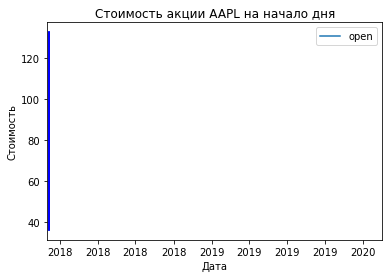

In [22]:
open_aapl = []

open_aapl = open_w(aapl_list) # список со стоиомостями акциий на отрытие дня

x = [m for m in range(1, 758)]

plt.plot(x_data, open_aapl)
plt.title("Стоимость акции AAPL на начало дня")
plt.xlabel("Дата")
plt.ylabel("Стоимость")
plt.legend(['open'])

# Вызовем subplot явно, чтобы получить экземпляр класса AxesSubplot,
# из которого будем иметь доступ к осям
axes = pylab.subplot(1, 1, 1)

    # Пусть в качестве меток по оси X выводится только год
    
axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))

    # Отобразим данные
pylab.plot_date(xdata_float, open_aapl, fmt="b-")

    # Изменим левую границу
pylab.xlim(xmin=matplotlib.dates.date2num(date(2017, 12, 1)))

#pylab.grid()
    

plt.show


<function matplotlib.pyplot.show(*args, **kw)>

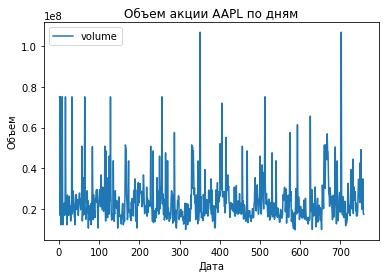

In [60]:
volume_aapl = []

volume_aapl = volume_w(aapl_list)

plt.plot(x, volume_aapl)
plt.title("Объем акции AAPL по дням")
plt.xlabel("Дата")
plt.ylabel("Объем")
plt.legend(['volume'])
plt.show

CSCO

In [46]:
with open('HistoricalQuotesCSCO.csv', newline='') as f:
    reader = csv.reader(f)
    csco_list = list(reader)

<function matplotlib.pyplot.show(*args, **kw)>

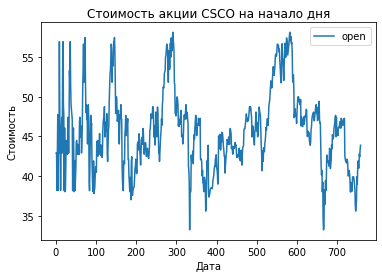

In [61]:
open_csco = []

open_csco = open_w(csco_list) # список со стоиомостями акциий на отрытие дня

plt.plot(x, open_csco)
plt.title("Стоимость акции CSCO на начало дня")
plt.xlabel("Дата")
plt.ylabel("Стоимость")
plt.legend(['open'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

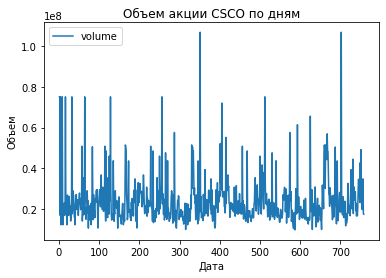

In [62]:
volume_csco = []

volume_csco = volume_w(csco_list)

plt.plot(x, volume_csco)
plt.title("Объем акции CSCO по дням")
plt.xlabel("Дата")
plt.ylabel("Объем")
plt.legend(['volume'])
plt.show

MSFT

In [49]:
with open('HistoricalQuotesMSFT.csv', newline='') as f:
    reader = csv.reader(f)
    msft_list = list(reader)

<function matplotlib.pyplot.show(*args, **kw)>

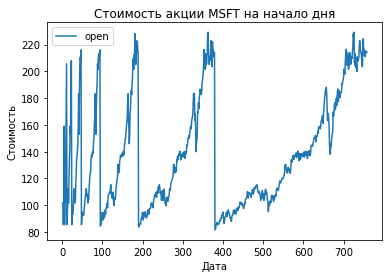

In [63]:
open_msft = []

open_msft = open_w(msft_list) # список со стоиомостями акциий на отрытие дня

plt.plot(x, open_msft)
plt.title("Стоимость акции MSFT на начало дня")
plt.xlabel("Дата")
plt.ylabel("Стоимость")
plt.legend(['open'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

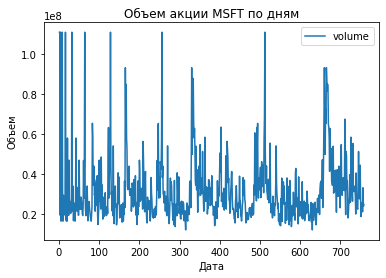

In [73]:
volume_msft = []

volume_msft = volume_w(msft_list)

plt.plot(x, volume_msft)
plt.title("Объем акции MSFT по дням")
plt.xlabel("Дата")
plt.ylabel("Объем")
plt.legend(['volume'])

plt.show